In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [9]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([1, 8, 0, 1])

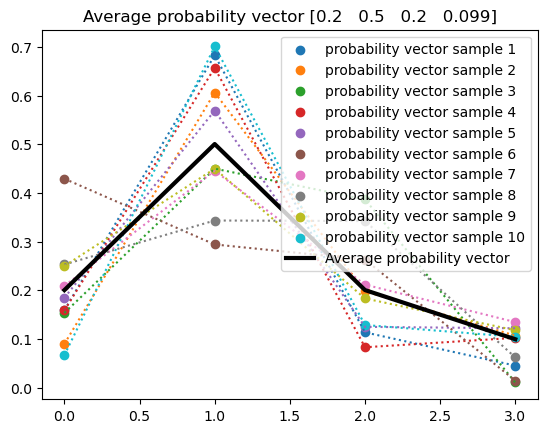

In [8]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

There would not be a specific pattern, but overall there should be an increasing trend.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


In [24]:
stats.dirichlet(alpha=[2,5,2,1]).rvs(100),stats.dirichlet(alpha=[4,7,9,10]).rvs(100)

(array([[0.20113131, 0.3510927 , 0.28548545, 0.16229054],
        [0.17737887, 0.60840104, 0.20549227, 0.00872782],
        [0.23573547, 0.6552435 , 0.07042781, 0.03859322],
        [0.42456343, 0.34168027, 0.15531809, 0.07843821],
        [0.03572551, 0.58374469, 0.30835216, 0.07217763],
        [0.20076723, 0.67500308, 0.07412805, 0.05010164],
        [0.11266692, 0.49168686, 0.19123548, 0.20441074],
        [0.07149531, 0.64238682, 0.2202915 , 0.06582637],
        [0.28495464, 0.16676617, 0.47551352, 0.07276567],
        [0.09773681, 0.62445577, 0.26014113, 0.01766628],
        [0.16724121, 0.72170908, 0.05196914, 0.05908057],
        [0.56465454, 0.29799268, 0.11421275, 0.02314003],
        [0.26450646, 0.42249417, 0.20142216, 0.11157721],
        [0.06770644, 0.48465393, 0.41635931, 0.03128032],
        [0.18957973, 0.50863792, 0.1375213 , 0.16426105],
        [0.08086726, 0.34301116, 0.52234252, 0.05377906],
        [0.32406031, 0.2867424 , 0.26762069, 0.1215766 ],
        [0.213

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [25]:
j=1

stats.dirichlet(alpha=[2,5,2,1]).rvs(100),stats.dirichlet(alpha=[4,7,9,10]).rvs(100)

(array([[2.87450630e-02, 4.93507781e-01, 5.88687375e-02, 4.18878419e-01],
        [1.39764469e-01, 6.50063717e-01, 7.22323963e-02, 1.37939418e-01],
        [9.53782745e-02, 2.33032474e-01, 5.26170554e-01, 1.45418697e-01],
        [1.54672824e-01, 7.56135062e-01, 7.37252716e-02, 1.54668418e-02],
        [1.23173172e-01, 4.01360926e-01, 4.63663923e-01, 1.18019791e-02],
        [3.03322944e-01, 3.05265602e-01, 2.08657808e-01, 1.82753645e-01],
        [2.36262578e-01, 6.30508776e-01, 8.98956472e-02, 4.33329992e-02],
        [1.96545890e-01, 5.82273273e-01, 1.52328853e-01, 6.88519827e-02],
        [9.00251427e-02, 7.21344876e-01, 1.19602496e-01, 6.90274847e-02],
        [9.75488052e-02, 3.18297187e-01, 3.78040403e-01, 2.06113605e-01],
        [1.62681109e-01, 4.26535640e-01, 2.87036200e-01, 1.23747050e-01],
        [1.79429827e-01, 5.35581383e-01, 2.50426844e-01, 3.45619459e-02],
        [2.58553036e-01, 6.00134744e-01, 1.87696393e-02, 1.22542581e-01],
        [7.17030292e-02, 4.34240784e-0

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [23]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`
number = 0 
for q in range(10):
    number += stats.dirichlet(alpha=[2,5,2,1]).pmf(q)
number

AttributeError: 'dirichlet_frozen' object has no attribute 'pmf'

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [22]:
(stats.dirichlet(alpha=[2,5,2,1]).rvs(100)>stats.dirichlet(alpha=[4,7,9,10]).rvs(100))

array([[ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [ True,  True,  True, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [False,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [False,  True, False, False],
       [ True,  True, False, False],
       [False,  True, False,  True],
       [ True,  True, False, False],
       [ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
 

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [27]:
stats.dirichlet(alpha=[2,5,2,1]).rvs(100)/stats.dirichlet(alpha=[4,7,9,10]).rvs(100)

array([[7.20319453e-01, 3.71474080e+00, 8.21235370e-02, 9.64333801e-01],
       [6.86616090e-01, 1.49085565e+00, 8.72149607e-01, 4.39614772e-01],
       [2.66370912e+00, 1.07300647e+00, 4.81570231e-01, 6.93692071e-01],
       [1.15194805e+00, 1.77446556e+00, 6.99947181e-01, 5.22014519e-01],
       [5.69923219e-01, 2.87581540e+00, 6.82400056e-01, 5.26069619e-01],
       [3.15758482e+00, 2.73124903e+00, 1.66050989e-01, 2.25254222e-01],
       [3.20188191e+00, 2.25293723e+00, 3.72601516e-01, 8.84826802e-02],
       [4.17804354e-01, 4.88917855e+00, 5.74530305e-01, 2.77537251e-02],
       [9.46596245e-01, 1.92814544e+00, 7.96313047e-01, 7.64303985e-01],
       [5.72542836e-01, 3.29158886e+00, 4.48213319e-01, 6.27820305e-02],
       [2.18622760e-01, 1.10083850e+01, 3.19119007e-01, 4.65862369e-01],
       [1.65125847e+00, 1.97142914e+00, 1.39772819e+00, 2.15052436e-01],
       [2.38556583e+00, 8.50988977e-01, 3.38012617e-01, 7.16585667e-01],
       [9.82241808e-01, 3.13021002e+00, 1.90933475e

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

In [26]:
stats.dirichlet(alpha=[2,5,2,1]).rvs(100)- stats.dirichlet(alpha=[4,7,9,10]).rvs(100)

array([[-6.63743036e-02,  5.15500353e-01, -2.00197692e-01,
        -2.48928357e-01],
       [ 1.40460294e-01,  1.68198012e-01, -2.66002622e-01,
        -4.26556831e-02],
       [ 5.01366329e-02,  1.76583842e-01,  1.72912960e-02,
        -2.44011771e-01],
       [-4.57516002e-02,  3.40037617e-01, -8.09738493e-04,
        -2.93476278e-01],
       [-2.22930330e-02,  3.10229362e-01, -1.66690866e-01,
        -1.21245463e-01],
       [-1.06483164e-01,  2.45607264e-01,  9.01119434e-02,
        -2.29236043e-01],
       [ 8.95093259e-02,  1.10987677e-01,  5.36490285e-02,
        -2.54146032e-01],
       [ 1.24678405e-01,  4.22872025e-01, -1.64102587e-01,
        -3.83447842e-01],
       [ 3.63574548e-02,  1.54954667e-01, -5.99898458e-03,
        -1.85313138e-01],
       [-6.43514699e-02,  1.85334208e-01,  7.08173248e-02,
        -1.91800063e-01],
       [-1.36565623e-01,  1.29085266e-01,  1.38377912e-01,
        -1.30897556e-01],
       [ 1.68342390e-01,  3.29270601e-01, -1.68369955e-01,
      

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


[double click and replace this with your answer]

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


It is fixed